# Added IC Visualizations

In [1]:
#Importing libraries
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r"C:\Users\cavba\Documents\Instacart Basket Analysis"

In [3]:
df_active = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ic_active_customers.pkl'))

In [4]:
df_active.head()

,user_id,Gender,STATE,Age,date_joined,number_of_dependants,family_status,income,product_id,product_name,...,busiest day,Result,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_order,frequency_flag,region
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regular busy,busiest days,Most orders,8,New customer,5.111111,Low Spender,19.0,Regular Customer,Midwest
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regular busy,regular days,Most orders,8,New customer,5.111111,Low Spender,19.0,Regular Customer,Midwest
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regular busy,busiest days,Most orders,8,New customer,5.111111,Low Spender,19.0,Regular Customer,Midwest
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Regular busy,regular days,Most orders,8,New customer,5.111111,Low Spender,19.0,Regular Customer,Midwest
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Regular busy,slowest days,Most orders,8,New customer,5.111111,Low Spender,19.0,Regular Customer,Midwest


In [5]:
df_active.shape

(17085443, 31)

In [6]:
df_active.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17085443 entries, 0 to 18339448
Data columns (total 31 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 int64  
 1   Gender                  object 
 2   STATE                   object 
 3   Age                     int64  
 4   date_joined             object 
 5   number_of_dependants    int64  
 6   family_status           object 
 7   income                  int64  
 8   product_id              int64  
 9   product_name            object 
 10  aisle_id                int64  
 11  department_id           int64  
 12  prices                  float64
 13  order_id                int64  
 14  order_number            int64  
 15  orders_day_of_the_week  int64  
 16  order_hour_of_day       int64  
 17  days_since_prior_order  float64
 18  add_to_cart_order       int64  
 19  reordered               int64  
 20  price_range_loc         object 
 21  busiest day             objec

### Creating new weekday column with written names

In [7]:
#Defining order day of the week values
def weekday_label(row):
    
    if row['orders_day_of_the_week'] == 0:
        return 'Saturday'
    elif row['orders_day_of_the_week'] == 1:
        return 'Sunday'
    elif row['orders_day_of_the_week'] == 2:
        return 'Monday'
    elif row['orders_day_of_the_week'] == 3:
        return 'Tuesday'
    elif row['orders_day_of_the_week'] == 4:
        return 'Wednesday'
    elif row['orders_day_of_the_week'] == 5:
        return 'Thursday'
    elif row['orders_day_of_the_week'] == 6:
        return 'Friday'
    else: return 'Not enough data'

In [8]:
df_active.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17085443 entries, 0 to 18339448
Data columns (total 31 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 int64  
 1   Gender                  object 
 2   STATE                   object 
 3   Age                     int64  
 4   date_joined             object 
 5   number_of_dependants    int64  
 6   family_status           object 
 7   income                  int64  
 8   product_id              int64  
 9   product_name            object 
 10  aisle_id                int64  
 11  department_id           int64  
 12  prices                  float64
 13  order_id                int64  
 14  order_number            int64  
 15  orders_day_of_the_week  int64  
 16  order_hour_of_day       int64  
 17  days_since_prior_order  float64
 18  add_to_cart_order       int64  
 19  reordered               int64  
 20  price_range_loc         object 
 21  busiest day             objec

In [9]:
#Creating a copy of the original dataframe to apply weekday_label
df_active2 = df_active

In [10]:
df_active2['weekday'] = df_active2.apply(weekday_label, axis=1)

In [11]:
df_active2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17085443 entries, 0 to 18339448
Data columns (total 32 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 int64  
 1   Gender                  object 
 2   STATE                   object 
 3   Age                     int64  
 4   date_joined             object 
 5   number_of_dependants    int64  
 6   family_status           object 
 7   income                  int64  
 8   product_id              int64  
 9   product_name            object 
 10  aisle_id                int64  
 11  department_id           int64  
 12  prices                  float64
 13  order_id                int64  
 14  order_number            int64  
 15  orders_day_of_the_week  int64  
 16  order_hour_of_day       int64  
 17  days_since_prior_order  float64
 18  add_to_cart_order       int64  
 19  reordered               int64  
 20  price_range_loc         object 
 21  busiest day             objec

In [12]:
df_active2.head()

,user_id,Gender,STATE,Age,date_joined,number_of_dependants,family_status,income,product_id,product_name,...,Result,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_order,frequency_flag,region,weekday
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,busiest days,Most orders,8,New customer,5.111111,Low Spender,19.0,Regular Customer,Midwest,Sunday
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,regular days,Most orders,8,New customer,5.111111,Low Spender,19.0,Regular Customer,Midwest,Thursday
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,busiest days,Most orders,8,New customer,5.111111,Low Spender,19.0,Regular Customer,Midwest,Sunday
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,regular days,Most orders,8,New customer,5.111111,Low Spender,19.0,Regular Customer,Midwest,Monday
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,slowest days,Most orders,8,New customer,5.111111,Low Spender,19.0,Regular Customer,Midwest,Tuesday


In [13]:
df_active2.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'dow_new.pkl'))

## Crosstabs

In [14]:
crosstab = pd.crosstab(df_active['region'], df_active['spending_flag'], dropna = False)

In [15]:
crosstab

spending_flag,High Spender,Low Spender
region,,
Midwest,2677947,1321807
Northeast,2054383,967609
South,3841327,1848252
West,2956840,1417278


In [16]:
crosstab2 = pd.crosstab(df_active['region'], df_active['loyalty_flag'], dropna = False)

In [17]:
crosstab2

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,1348211,531210,2120333
Northeast,1056771,394673,1570548
South,1930366,748683,3010530
West,1511138,581556,2281424


## Creating customer profiles

In [18]:
#Creating single adult profile
df_active.loc[(df_active['family_status']== 'single') & (df_active['number_of_dependants']== 0), 'customer_profile'] = 'Single adult'

In [19]:
#Creating young parent profile
df_active.loc[(df_active['Age']<=30) & (df_active['number_of_dependants'] > 0), 'customer_profile'] = 'Young parent'

In [20]:
#Creating married with children profile
df_active.loc[(df_active['family_status'] =='married')  & (df_active['number_of_dependants'] >= 1), 'customer_profile'] = 'Married with children'

In [21]:
#Creating married without children profile
df_active.loc[(df_active['family_status'] =='married')  & (df_active['number_of_dependants'] == 0), 'customer_profile'] = 'Married no children'

In [22]:
#Creating other single adult profile
df_active.loc[(df_active['family_status'] =='divorced/widowed') & (df_active['Age'] > 30) & (df_active['number_of_dependants'] == 0), 'customer_profile'] = 'Other single adult'

In [23]:
#Creating lives with relatives profile
df_active.loc[(df_active['family_status'] =='living with parents and siblings'), 'customer_profile'] = 'Lives with relatives'

In [24]:
df_active['customer_profile'].value_counts()

Married with children    11997596
Single adult              2800710
Other single adult        1465754
Lives with relatives       821383
Name: customer_profile, dtype: int64

## Exporting dataset with customer profiles

In [25]:
#Exporting the final IC data set with customer profiles
df_active.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_customers_final.pkl'))

## Crosstabs continued

In [26]:
#creating a cross tab for regions and customer profiles
crosstab3 = pd.crosstab(df_active['region'], df_active['customer_profile'], dropna = False)

In [27]:
crosstab3

customer_profile,Lives with relatives,Married with children,Other single adult,Single adult
region,,,,
Midwest,191756,2801524,340275,666199
Northeast,142063,2133572,266775,479582
South,281168,3988286,486481,933644
West,206396,3074214,372223,721285


In [28]:
crosstab5 = pd.crosstab(df_active['region'], df_active['number_of_dependants'], dropna = False)

In [29]:
crosstab5

number_of_dependants,0,1,2,3
region,,,,
Midwest,1006474,1019249,994416,979615
Northeast,746357,763983,749171,762481
South,1420125,1398179,1446010,1425265
West,1093508,1083119,1079125,1118366


In [30]:
pd.crosstab(df_active['customer_profile'], df_active['number_of_dependants'], dropna = False)

number_of_dependants,0,1,2,3
customer_profile,,,,
Lives with relatives,0,285669,267671,268043
Married with children,0,3978861,4001051,4017684
Other single adult,1465754,0,0,0
Single adult,2800710,0,0,0


In [31]:
pd.crosstab(df_active['customer_profile'], df_active['spending_flag'], dropna = False)

spending_flag,High Spender,Low Spender
customer_profile,,
Lives with relatives,561900,259483
Married with children,8085776,3911820
Other single adult,993875,471879
Single adult,1888946,911764


## Charts

### Regional customer loyalty

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

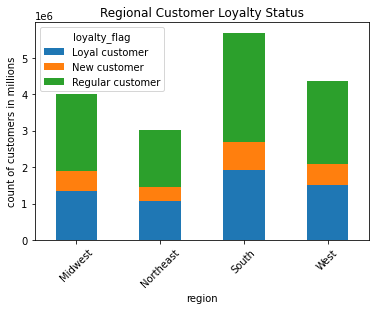

In [32]:
#stacked bar chart
regional_loyalty_viz = pd.crosstab(df_active['region'], df_active['loyalty_flag'], dropna = False).plot(kind='bar', stacked=True)
plt.title('Regional Customer Loyalty Status')
plt.ylabel('count of customers in millions')
plt.xticks(rotation = 45)

There are more regular customers in the South than any other region. New customer numbers are low, leaving room for customer growth across each region. Loyal customer counts don't differ drastically across regions

In [33]:
regional_loyalty_viz.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regional_loyalty_habits.png'), bbox_inches = 'tight')

### Customer profile totals by region

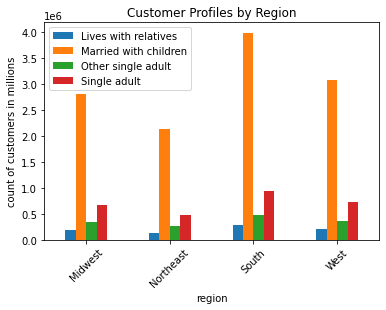

In [34]:
regional_profile_comp = pd.crosstab(df_active['region'], df_active['customer_profile'], dropna = False).plot(kind='bar')
plt.title('Customer Profiles by Region')
plt.ylabel('count of customers in millions')
plt.xticks(rotation = 45)
plt.legend(loc = 'upper left')

There are more married customers with children than any other customer profile across all regions. The South has a higher count of single adults than other regions.

In [35]:
regional_profile_comp.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regional_customer_profile.png'), bbox_inches = 'tight')

### High / Low spending by region

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

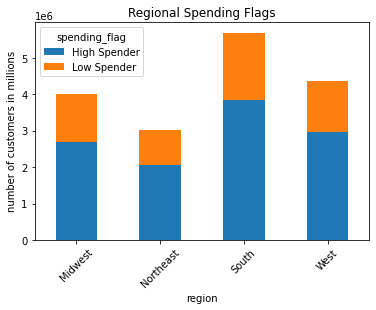

In [36]:
#Spending trend by region
spend_flag_comp = pd.crosstab(df_active['region'], df_active['spending_flag'], dropna = False).plot(kind='bar', stacked=True)
plt.title('Regional Spending Flags')
plt.ylabel('number of customers in millions')
plt.xticks(rotation = 45)

There are more high spenders in each region. It can be assumed that higher priced items do not deter customers.

In [37]:
spend_flag_comp.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regional_spending_flag.png'), bbox_inches = 'tight')

### Number of dependants by customer profile

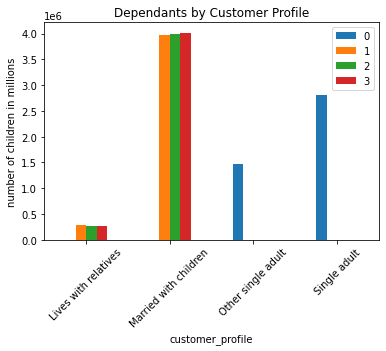

In [38]:
dependants = pd.crosstab(df_active['customer_profile'], df_active['number_of_dependants'], dropna = False).plot(kind='bar')
plt.title('Dependants by Customer Profile')
plt.ylabel('number of children in millions')
plt.xticks(rotation = 45)
plt.legend(loc = 'upper right')

In [39]:
dependants.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependants_profile.png'), bbox_inches = 'tight')

### Spending habits by customer profile

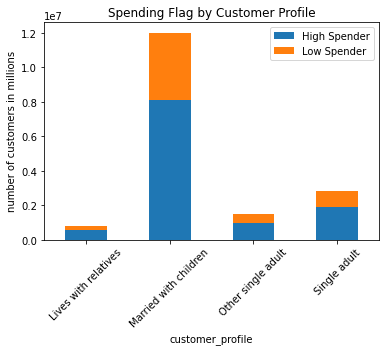

In [40]:
#Showing spending habits across customer profiles
profile_spender = pd.crosstab(df_active['customer_profile'], df_active['spending_flag'], dropna = False).plot(kind='bar', stacked=True)
plt.title('Spending Flag by Customer Profile')
plt.ylabel('number of customers in millions')
plt.xticks(rotation = 45)
plt.legend(loc = 'upper right')

Clearly there are more customers that a married with children using instacart than any other customer profile.

In [41]:
profile_spender.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spender_profile.png'), bbox_inches = 'tight')

### Loyalty by customer profile

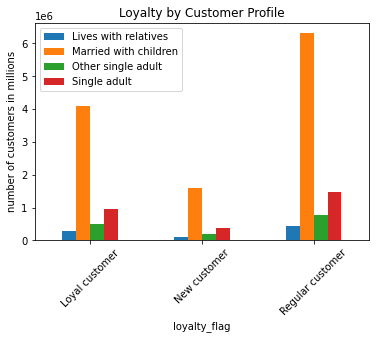

In [42]:
#Loyalty by customer profile
profile_loyalty = pd.crosstab(df_active['loyalty_flag'], df_active['customer_profile'], dropna = False).plot(kind='bar')
plt.title('Loyalty by Customer Profile')
plt.ylabel('number of customers in millions')
plt.xticks(rotation = 45)
plt.legend(loc = 'upper left')

In [43]:
profile_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_profile.png'), bbox_inches = 'tight')

### Price range variables

In [44]:
df_active['price_range_loc'].value_counts()

Mid-range product     11754404
Low-range product      5097452
High-range product      233587
Name: price_range_loc, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Mid-range product'),
  Text(1, 0, 'Low-range product'),
  Text(2, 0, 'High-range product')])

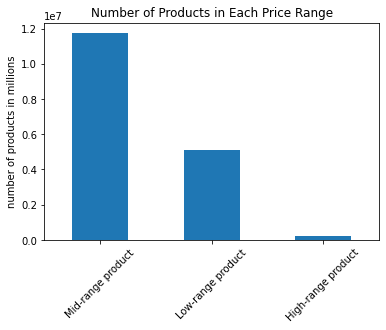

In [45]:
#Frequency of products within each price range
price_ranges_chrt = df_active['price_range_loc'].value_counts().plot(kind='bar')
plt.title('Number of Products in Each Price Range')
plt.ylabel('number of products in millions')
plt.xticks(rotation = 45)

In [46]:
price_ranges_chrt.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'qty_price_ranges.png'), bbox_inches = 'tight')

<AxesSubplot:xlabel='Age'>

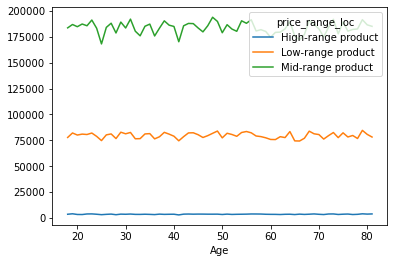

In [47]:
pd.crosstab(df_active['Age'], df_active['price_range_loc'], dropna = False).plot()

<AxesSubplot:xlabel='Age', ylabel='avg_price'>

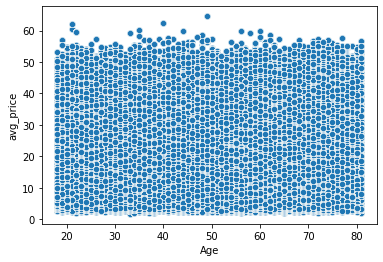

In [48]:
sns.scatterplot(x = 'Age', y ='avg_price', data = df_active)

### Price range by loyalty

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

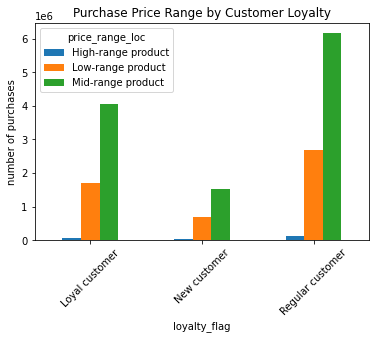

In [49]:
#Charting product price range frequency by loyalty status
loyal_price_range = pd.crosstab(df_active['loyalty_flag'], df_active['price_range_loc'], dropna = False).plot(kind='bar')
plt.title('Purchase Price Range by Customer Loyalty')
plt.ylabel('number of purchases')
plt.xticks(rotation = 45)

In [50]:
loyal_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_by_price_range.png'), bbox_inches = 'tight')

### Spending loyalty

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

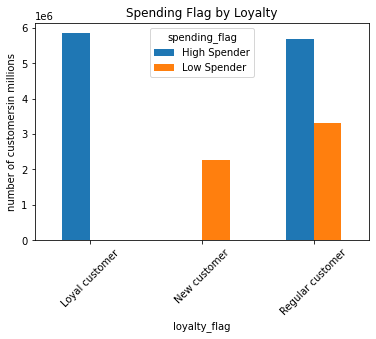

In [51]:
#Spending flags by customer loyalty status
loyalty_high_low = pd.crosstab(df_active['loyalty_flag'], df_active['spending_flag'], dropna = False).plot(kind='bar')
plt.title('Spending Flag by Loyalty')
plt.ylabel('number of customersin millions')
plt.xticks(rotation = 45)

In [52]:
loyalty_high_low.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_spend_flag.png'), bbox_inches = 'tight')

### Customer profile loyalty comparison

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

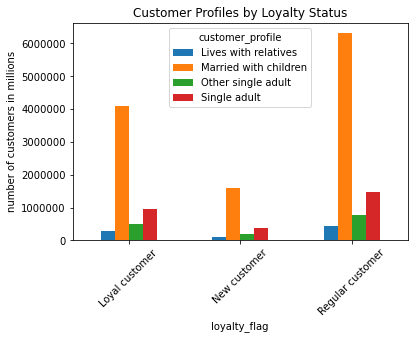

In [53]:
#Comparing loyalty status to customer profiles
profile_loyalty = pd.crosstab(df_active['loyalty_flag'], df_active['customer_profile'], dropna = False).plot(kind='bar')
plt.title('Customer Profiles by Loyalty Status')
plt.ticklabel_format(axis = 'y', useOffset = None, style= 'plain')
plt.ylabel('number of customers in millions')
plt.xticks(rotation = 45)

In [54]:
profile_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_profile_loyalty_flag.png'), bbox_inches = 'tight')

### Regional customer profile distribution

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Lives with relatives'),
  Text(1, 0, 'Married with children'),
  Text(2, 0, 'Other single adult'),
  Text(3, 0, 'Single adult')])

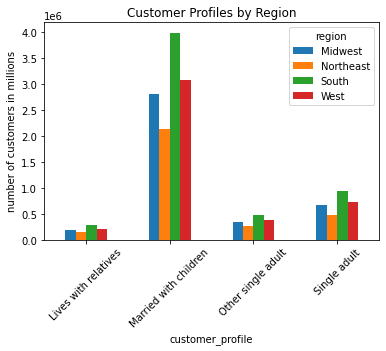

In [55]:
#Charting customer profiles by region
profile_regional = pd.crosstab(df_active['customer_profile'], df_active['region'], dropna = False).plot(kind='bar')
plt.title('Customer Profiles by Region')
plt.ylabel('number of customers in millions')
plt.xticks(rotation = 45)

In [56]:
profile_regional.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regional_order_freq.png'), bbox_inches = 'tight')

### Busiest day of the week

In [68]:
busiest = df_active2['weekday'].value_counts().rename_axis('Day').to_frame(name='counts')
print(busiest)

            counts
Day               
Saturday   3254663
Sunday     2992782
Friday     2363475
Thursday   2228053
Monday     2219444
Tuesday    2024835
Wednesday  2002191


In [69]:
busiest.dtypes

counts    int64
dtype: object

In [81]:
busiest["counts"] = [float(str(i).replace(",", "")) for i in busiest["counts"]]

In [77]:
busiest['counts'] = busiest['counts'].astype(int).apply(lambda x: "{:,}".format(x))

In [78]:
busiest

,counts
Day,
Saturday,"3,254,663"
Sunday,"2,992,782"
Friday,"2,363,475"
Thursday,"2,228,053"
Monday,"2,219,444"
Tuesday,"2,024,835"
Wednesday,"2,002,191"


In [79]:
busiest.dtypes

counts    object
dtype: object

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Saturday'),
  Text(1, 0, 'Sunday'),
  Text(2, 0, 'Friday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Monday'),
  Text(5, 0, 'Tuesday'),
  Text(6, 0, 'Wednesday')])

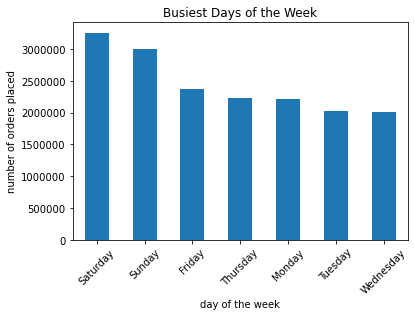

In [82]:
busy_day_details = busiest.plot.bar()
plt.legend('', frameon = False)
plt.title('Busiest Days of the Week')
plt.ylabel('number of orders placed')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('day of the week')
plt.xticks(rotation = 45)

In [ ]:
busy_day_details.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow41721.png'), bbox_inches = 'tight')

### Avg order price each day

In [ ]:
df_5 = df_active[['orders_day_of_the_week', 'avg_price']]

In [ ]:
line_priceday = sns.lineplot(data=df_5, x='orders_day_of_the_week', y='avg_price')
plt.title('Average Order Prices by Day of the Week')
plt.xlabel('Day of the Week')

In [ ]:
line_priceday.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'daily_price_avg.png'), bbox_inches = 'tight')

## Creating big and small data subsets from df_active

#### smaller dataset will make line charts run quicker

In [ ]:
dev = np.random.rand(len(df_active)) <=0.7

In [ ]:
big = df_active[dev]

In [ ]:
big.shape

In [ ]:
small = df_active[~dev]

In [ ]:
small.shape

In [ ]:
df_active.shape

In [ ]:
df_7 = small[:1000000]

In [ ]:
line3 = sns.lineplot( x='customer_profile', y='avg_price', data = df_7)
plt.title('Average Order Price by Customer Profile')
plt.xlabel('customer profile')
plt.ylabel('average price')

In [ ]:
line3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'avg_customer_price.png'), bbox_inches = 'tight')

### Comparing age, income, and customer profile

In [ ]:
l2 = sns.lineplot(data = small, x = 'Age',y = 'income', hue ='customer_profile')
plt.title('Age/ Income Comparison')

There's an anomoly around customers that are 40 years old, shown in the dramatic spiked line

In [ ]:
l2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_income_comp.png'), bbox_inches = 'tight')

In [ ]:
age_count = small['Age'].value_counts()

In [ ]:
age_count

In [ ]:
age_count.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'age_counts.csv'))

In [ ]:
income_histogram = small['income'].plot.hist(bins = 25)

In [ ]:
sns.scatterplot(x = 'Age', y ='income', data = df_active2)